# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\users\juanl\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Load the data


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('Train size:', x_train.shape[0])
print('Test size:', x_test.shape[0])

11493376/11490434 [==============================] - 19s 2us/step
Train size: 60000
Test size: 10000


# Build the network 

In [3]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print(l.name, l.input_shape,'==>', l.output_shape)

print(model.summary())

dense (None, 784) ==> (None, 512)
dense_1 (None, 512) ==> (None, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


# Train the network

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4290 - accuracy: 0.8758 - val_loss: 0.1317 - val_accuracy: 0.9620
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1140 - accuracy: 0.9667 - val_loss: 0.0908 - val_accuracy: 0.9722
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0706 - accuracy: 0.9796 - val_loss: 0.0752 - val_accuracy: 0.9774
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0486 - accuracy: 0.9859 - val_loss: 0.0667 - val_accuracy: 0.9796
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0357 - accuracy: 0.9898 - val_loss: 0.0624 - val_accuracy: 0.9816
Test loss: 0.062
Test accuracy: 0.982


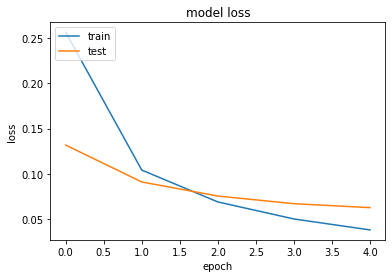

In [5]:
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=100)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Build networks using all activations

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.5042 - acc: 0.8480 - val_loss: 0.3072 - val_acc: 0.9148
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3078 - acc: 0.9134 - val_loss: 0.3311 - val_acc: 0.9055
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2982 - acc: 0.9180 - val_loss: 0.2908 - val_acc: 0.9181
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2795 - acc: 0.9203 - val_loss: 0.2816 - val_acc: 0.9228
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2793 - acc: 0.9208 - val_loss: 0.2832 - val_acc: 0.9217
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2785 - acc: 0.9209 - val_loss: 0.2982 - val_acc: 0.9161
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2733 - acc: 0.9243 - val_loss: 0.2965 - val_acc: 0.9203
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.

Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0715 - acc: 0.9787 - val_loss: 0.0765 - val_acc: 0.9773
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0478 - acc: 0.9859 - val_loss: 0.0716 - val_acc: 0.9775
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0382 - acc: 0.9890 - val_loss: 0.0783 - val_acc: 0.9773
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0290 - acc: 0.9915 - val_loss: 0.0793 - val_acc: 0.9770
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0205 - acc: 0.9940 - val_loss: 0.0746 - val_acc: 0.9785
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0148 - acc: 0.9956 - val_loss: 0.0699 - val_acc: 0.9812
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0130 - acc: 0.9962 - val_loss: 0.0700 - val_acc: 0.9822
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0

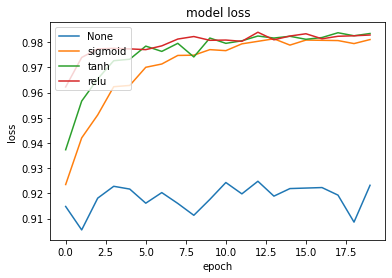

In [6]:
epochs = 20

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['acc'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
    plt.plot(history.history['val_acc'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')